제품_친밀도,제품_적절성,제품_만족도
3,4,3
3,3,2
4,4,4
2,2,2
2,2,2
3,3,3


  제품_친밀도     제품_적절성     제품_만족도   
 Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:3.000   1st Qu.:3.000  
 Median :3.000   Median :3.000   Median :3.000  
 Mean   :2.928   Mean   :3.133   Mean   :3.095  
 3rd Qu.:4.000   3rd Qu.:4.000   3rd Qu.:4.000  
 Max.   :5.000   Max.   :5.000   Max.   :5.000  

'data.frame':	264 obs. of  3 variables:
 $ 제품_친밀도: int  3 3 4 2 2 3 4 2 3 4 ...
 $ 제품_적절성: int  4 3 4 2 2 3 4 2 2 2 ...
 $ 제품_만족도: int  3 2 4 2 2 3 4 2 3 3 ...


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


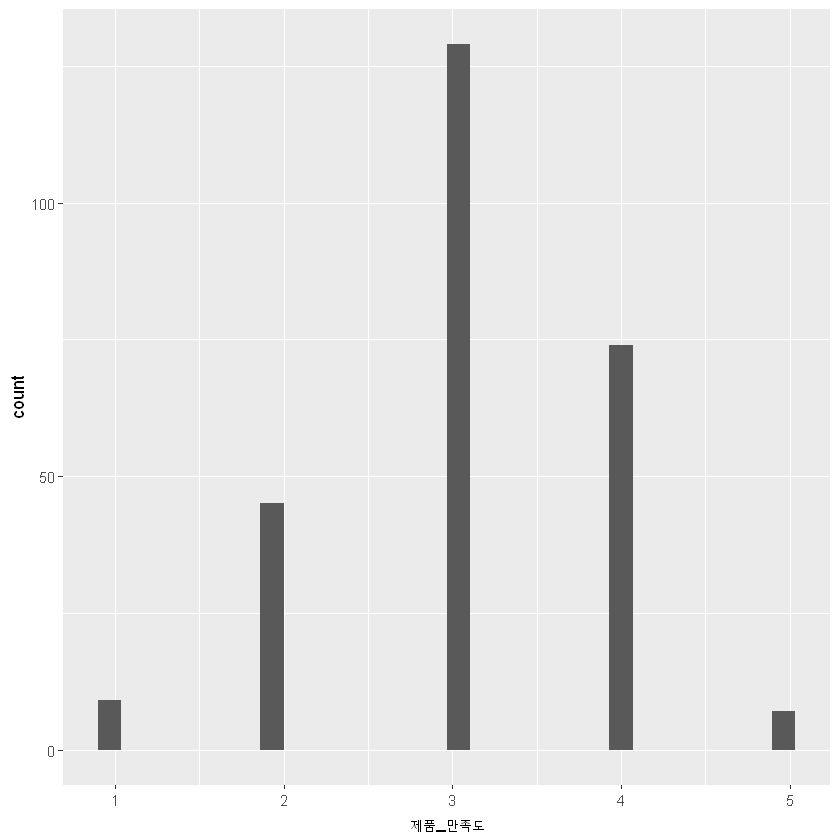

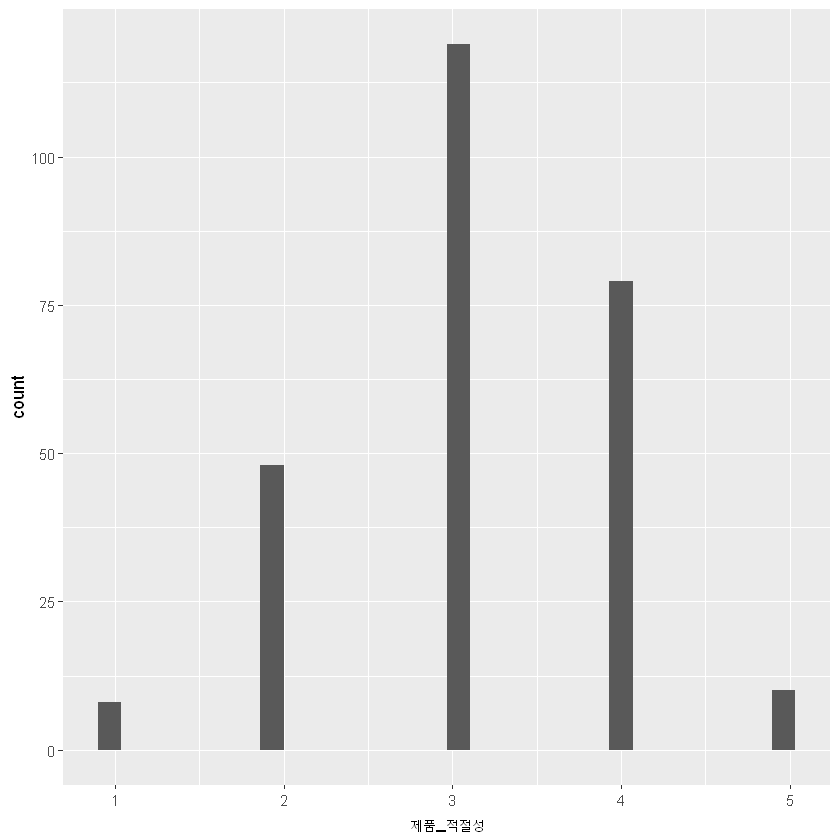

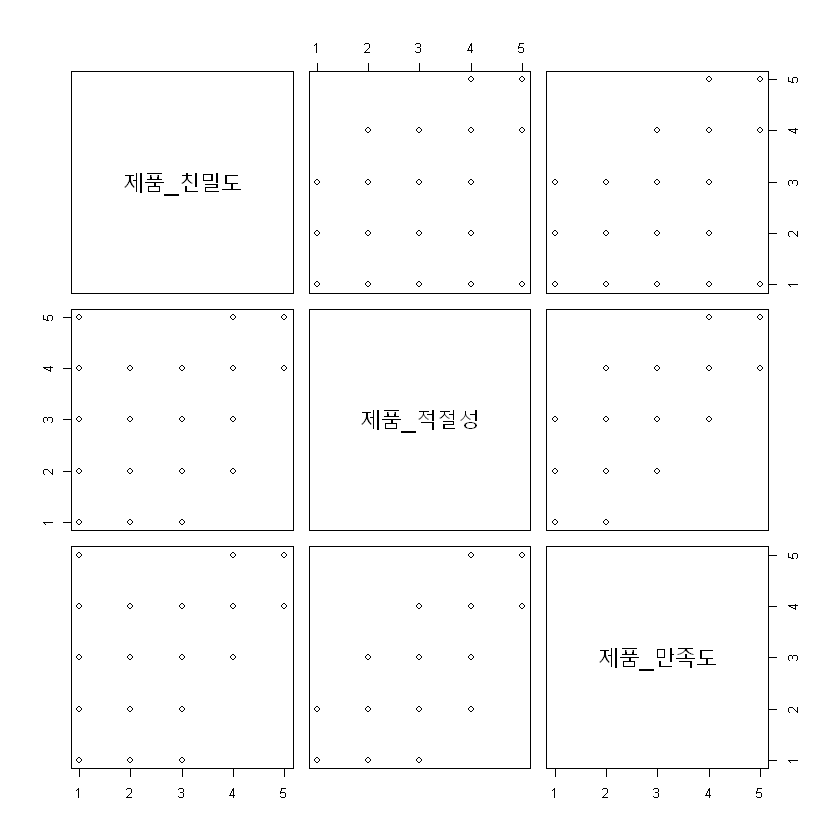

In [4]:
#데이터 불러오고 EDA
library(ggplot2)
library(caret)
#install.packages("SyncRNG")


df<-read.csv("E:/GoogleDrive/포트폴리오/A5팀 R과 Python기반 머신러닝과 딥러닝 분석 비교(12월22일)/dataset/product.csv")
head(df)
summary(df)
str(df)
ggplot(df)+geom_histogram(aes(제품_만족도))
ggplot(df)+geom_histogram(aes(제품_적절성))
pairs(df)

In [14]:
#모델 생성
library(SyncRNG)
v <- 1:nrow(df)
s <- SyncRNG(seed=42)
idx <- s$shuffle(v)[1:round(nrow(df)*0.7)]

idx[1:length(idx)]
train <- df[idx,]
test <- df[-idx,]


m_lm<-lm(제품_만족도~제품_적절성, train[,-1])
m_lm
summary(m_lm)

Warning message:
"package 'SyncRNG' was built under R version 3.6.3"

[1] 166  73 130 117 101  91 190 251  41  26 137  59 228 104   1 178 218 118
 [19] 144  37  56 185 102  20 213  84 169   8 172  67 195  74 138  28 236 216
 [37] 170  76 249 256  19  42  31 100 175 235 160  22 224  79 135  12 110  63
 [55] 136 156  44  55 145 174  71 165 167  54 246 131  27 111  17 232 257 143
 [73]  65  70 146 210  92 129 105 108  29  83 126   3  30 149 199 219  13 206
 [91] 132  46 212 116 192 179  64 133 241 186 120 203   9 261 103   6  33 200
[109] 209 263  25  47 183 217   2 253  72  68  61 161  40 106 247 202  34  90
[127] 141 259  60 226  97  99 113 211 258 148 222  38 204 123 164 173  89  78
[145] 194 147 193 227 205 163 109  16  14 239  98 115 188  80  88  95  77 223
[163] 201 154  10 184  62 187  11 112   7 152 171  35 238  23  32   4 122  15
[181] 221 225 151 119 208


Call:
lm(formula = 제품_만족도 ~ 제품_적절성, data = train[, -1])

Coefficients:
(Intercept)  제품_적절성  
     0.7171       0.7607  



Call:
lm(formula = 제품_만족도 ~ 제품_적절성, data = train[, -1])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.75974 -0.23841  0.00092  0.24026  1.24026 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.71708    0.14118   5.079 9.29e-07 ***
제품_적절성  0.76067    0.04402  17.281  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.522 on 183 degrees of freedom
Multiple R-squared:   0.62,	Adjusted R-squared:  0.618 
F-statistic: 298.6 on 1 and 183 DF,  p-value: < 2.2e-16


In [15]:
#모델 평가
p_lm<-predict(m_lm,test[,-1])
RMSE(p_lm,test[,3])
R2(p_lm,test[,3])

[1] 0.5585512

[1] 0.5023452

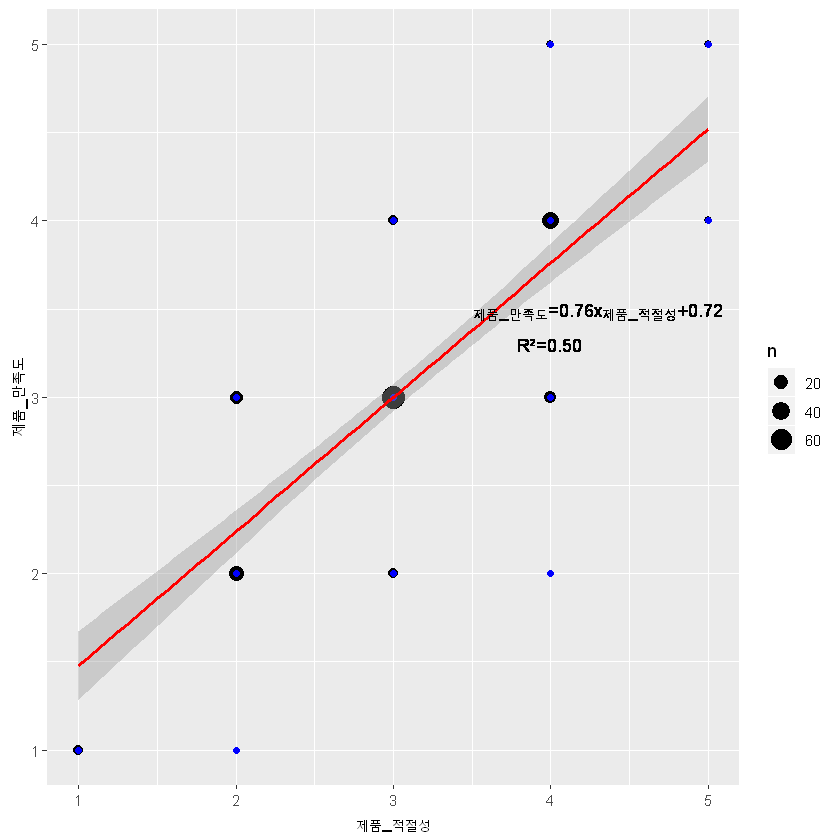

In [16]:
#시각화
ggplot(train,aes(x=제품_적절성,y=제품_만족도))+geom_count()+
      geom_point(color='blue')+
      stat_smooth(method='lm',color='red')+
      geom_text(x=4.3, y=3.5, label="제품_만족도=0.76x제품_적절성+0.72")+
      geom_text(x=4, y=3.3, label="R²=0.50")